# **Phase 2: Data Exploration & Visualization**

**Team 03:**

- Bruno Fernandes, up202108871
- Hugo Abelheira, up202409899
- Luís Pereira, up200502498

## **Table of Contents**

* [Imports](#imports)
* [After Preparation, Reading Cleaned Data](#clean-data)
* [Fire Duration vs Frequency](#duration-frequency)
* [First remarks after Data Preparation and before Exploration](#pre-expl)
* [Basic Statistic Measures](#sm1)
    * [Sum](#sum)
    * [Mode](#mode)
    * [Mean](#mean)
    * [Minimum & Maximum](#min-max)
    * [Median](#med)
    * [Variance](#var)
    * [Kernel Density Estimation (KDE)](#kde)
    * [Visualization](#vis)
    * [Standard Deviation](#sd)
* [Starting to dig deeper](#dig-deep)
    * [Fire Duration vs Frequency Across Districts Over Time (particular focus from 2017 onwards](#dur-freq)
    * [Correlation analysis](#corr)

<div style="text-align: justify;">
The data exploration and visualization stage complement each other and represent the main part of the descriptive process the data provide us, in a first moment. During this stage, we start to take some descriptive notes from the dataset in order to identify first trends, patterns, and relationships among the variables.
</div>

<div style="text-align: justify;">
Visualization tools will play a crucial role in this process, as they allow us to represent data graphically, making complex information easier to understand and interpret. By combining exploration and visualization, we enhance our ability to draw meaningful insights, guiding our analysis until informing our conclusions.
</div>

### **Imports**

In [488]:
#Importing Python libraries in order to compute statistic measures
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')
from scipy.stats import spearmanr

### **After Preparation, Reading Cleaned Data**

In [489]:
#The code reads data from specific sheets in two Excel files and stores the data in a dictionary called datasets.

files = {
    'datasets/clean_dataset.xlsx': ['SGIF_2011_2020'],
    'datasets/Estatisticas_Incendios_SGIF_2001_2023.xlsx': ['Estatisticas_PortugalContinent', 'Estatisticas_Distrito', 'Estatisticas_Concelho']
}

datasets = {}

for file, sheets in files.items():
    for sheet in sheets:
        if sheet == 'SGIF_2011_2020':
            datasets[sheet] = pd.read_excel(file, sheet_name='Sheet1')
        else:
            datasets[sheet] = pd.read_excel(file, sheet_name=sheet)

datasets

{'SGIF_2011_2020':         Ano  AreaTotal_ha  Duracao_Horas Distrito               Concelho  \
 0      2011        0.0100       0.733333    Porto               Penafiel   
 1      2011        0.0050       0.783333    Porto      Vila Nova de Gaia   
 2      2011        0.0400       2.033333    Porto      Vila Nova de Gaia   
 3      2011      140.0000       8.083333    Viseu       São Pedro do Sul   
 4      2011        0.1000       2.333333    Viseu           Castro Daire   
 ...     ...           ...            ...      ...                    ...   
 24621  2020        0.0050       0.633333    Porto      Paços de Ferreira   
 24622  2020        0.0100       1.283333    Viseu                Cinfães   
 24623  2020        0.0014       0.383333    Viseu  São João da Pesqueira   
 24624  2020        0.0050       0.716667    Viseu           Castro Daire   
 24625  2020        0.0100       0.933333    Porto                  Trofa   
 
       TypeArea  
 0       Forest  
 1       Forest  
 2

### <strong>Fire Duration <i>vs</i> Frequency</strong>

<div style="text-align: justify;">
    To explore how the mean fire duration influences the frequency of wildfires across different districts over time, we need to identify columns related to fire duration and frequency. The <i>'Num_IncendiosRurais'</i> column seems to represent the number of rural fires, which could be used as a measure of frequency. The <i>'Duracao_Horas'</i> column appears to help us finding insights about the fires duration.
</div>

### <strong>First remarks after Data Preparation and before Exploration</strong>

<div style="text-align: justify;">
    For the regular process of <string>Decision Making</strong> after preparing the dataset and before exploring the data, we noticed that the data in years 2011 and 2020 contains some trends difficult to explain statistically (a higher number of extreme outliers that skew the analysis and could not be statistically justified) or include phenomena that would definitely skew the analysis (e.g., 2020 was the main year of the COVID-19 pandemic). This might fail in providing a more representative picture, and for this reason, we also add the years 2014 and 2018 for further analysis and comparison. Until the beginning of Phase 3, we should be able to better check and understand this concern. This approach will strengthen our analysis and increase the confidence in our findings.
</div>

### **Basic Statistic Measures**

### Sum

In order to start summarizing data, we will calculate basic key statistics which might help us describing this context.

About the total number of fires for each district of interest, for the relevant years:

In [490]:
#The code finds the total number of fires registered for each district of interest.

# Define the districts of interest
districts_of_interest = ['Porto', 'Viseu', 'Faro']

# Normalize the 'Distrito' column to handle case sensitivity
datasets['Estatisticas_Distrito']['Distrito'] = datasets['Estatisticas_Distrito']['Distrito'].str.strip().str.title()

# Filter the dataset for the districts of interest
filtered_districts = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'].isin(districts_of_interest)]

# Group by district and sum the number of incidents
total_fires_per_district = filtered_districts.groupby('Distrito')['Num_IncendiosRurais'].sum().reset_index()

# Print the total number of fires for each district
print("Total number of fires for each district:")
for index, row in total_fires_per_district.iterrows():
    print(f"{row['Distrito']}: {row['Num_IncendiosRurais']}")

Total number of fires for each district:
Faro: 8968
Porto: 102395
Viseu: 38326


Just for reference, about the district with the <strong>highest total number of fires</strong>:

In [382]:
#District with the highest number of fires in total
# Calculate the total number of rural fires for each district without filtering by year
total_fires_per_district = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'].isin(districts_of_interest)]

# Group by district and sum the number of incidents
total_fires_per_district = total_fires_per_district.groupby('Distrito')['Num_IncendiosRurais'].sum().reset_index()

# Identify the district with the highest number of fires
max_fires_district = total_fires_per_district.loc[total_fires_per_district['Num_IncendiosRurais'].idxmax()]

# Print the result
print(f"The district with the highest number of fires is {max_fires_district['Distrito']} with {max_fires_district['Num_IncendiosRurais']} total fires.")

The district with the highest number of fires is Porto with 102395 total fires.


Here's an <strong>Histogram</strong> below showing the total fires per relevant district:

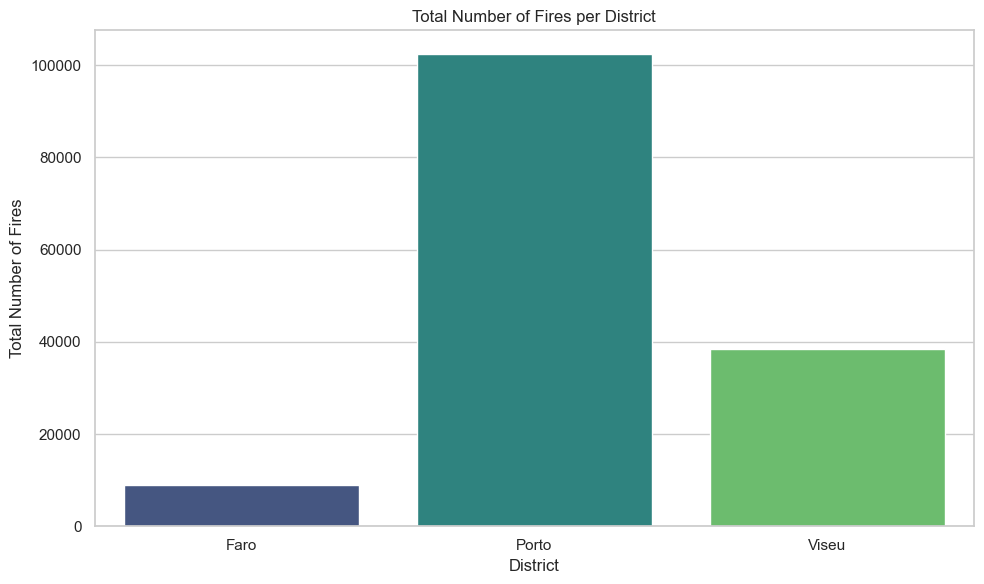

In [383]:
#This code filters the dataset for the districts of Porto, Viseu, and Faro, calculates the total number of rural fires in each district.
# Specify the districts of interest
districts_of_interest = ['Porto', 'Viseu', 'Faro']

# Filter and group data for total fires
total_fires = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'].isin(districts_of_interest)]
total_fires_per_district = total_fires.groupby('Distrito')['Num_IncendiosRurais'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Histogram of total fires per district
sns.barplot(data=total_fires_per_district, x='Distrito', y='Num_IncendiosRurais', palette='viridis')

# Customize plot
plt.title('Total Number of Fires per District')
plt.xlabel('District')
plt.ylabel('Total Number of Fires')

# Show plot
plt.tight_layout()
plt.show()

<strong>Note</strong>: Porto is also the Portuguese district with the second highest population density, according to the publicly acessible database of the Portuguese National Statistical Institute (or INE).

### Mode

The <strong>mode</strong> can serve as a useful metric to capture the most common or typical values within the data, offering insights into trends that may not be visible with mean or median alone, regardless if we are dealing with numerical or categorical data.

For the aforementioned districts, here's the <strong>mode</strong> found:

In [384]:
#This code calculates and displays the mode (most frequent value) of total fires for each specified district (Faro, Porto, Viseu) 
# Specify districts and years
districts = ['Faro', 'Porto', 'Viseu']

# Mode for total fires per district
mode_per_district = {}
for district in districts:
    mode_fires = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'] == district]['Num_IncendiosRurais'].mode()[0]
    mode_per_district[district] = mode_fires

# Display results for each district
for district, mode in mode_per_district.items():
    print(f"Mode for total number of fires in {district} district: {mode}")

Mode for total number of fires in Faro district: 274
Mode for total number of fires in Porto district: 1359
Mode for total number of fires in Viseu district: 523


### Mean

About the <strong>Mean</strong> regarding the number of fires (rounding the results to two decimal places):

In [445]:
#This code calculates the overall mean number of wildfires in Portugal and for the specified districts (Porto, Viseu, and Faro).

# Calculate the mean of total fires (Num_IncendiosRurais)
average_total_fires = round(datasets['Estatisticas_PortugalContinent']['Num_IncendiosRurais'].mean(), 2)
print(f"Mean of total fires: {average_total_fires}")
print()

# Calculate the mean number of fires for each district
districts_of_interest = ['Porto', 'Viseu', 'Faro']
district_averages = {}

for district in districts_of_interest:
    district_data = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'].str.title() == district]
    average_fires = round(district_data['Num_IncendiosRurais'].mean(), 2)
    district_averages[district] = average_fires

# Print the mean fires per district
print("Mean of fires per district:")
for district, average in district_averages.items():
    print(f"{district}: {average}")

Mean of total fires: 20464.83

Mean of fires per district:
Porto: 4451.96
Viseu: 1666.35
Faro: 389.91


<div style="text-align: justify;">
The <strong>Mean</strong> reveal a substantial disparity in wildfire occurrences between the districts, with Porto experiencing significantly more fires than both Viseu and Faro. The <strong>Mean</strong> referring to a country level suggests a significant occurrence of wildfires across the country. However, knowing the outliers could help to frame better this perception.
</div>

We may find the overall <strong>Mean</strong> fire duration (including not only the relevant districts for this research):

In [429]:
#This code calculates and prints the mean fire duration (rounded to two decimal places) in hours.
average_fire_duration = round(datasets['SGIF_2011_2020']['Duracao_Horas'].mean(), 2)

# Print the result
print(f"Mean fire duration in hours: {average_fire_duration}h")# Calculate the mean fire duration from the 'SGIF_2011_2020' dataset


Mean fire duration in hours: 1.73h


This value indicates the fire duration in hours is around 1.73h (mean).

Now, the <strong>Mean</strong> fire duration per district:

In [446]:
#This code calculates the mean fire duration for each district, and rounds it to two decimal places
# Define the districts of interest
districts_of_interest = ['Porto', 'Viseu', 'Faro']

# Normalize the 'Distrito' column to handle case sensitivity in the SGIF_2011_2020 dataset
datasets['SGIF_2011_2020']['Distrito'] = datasets['SGIF_2011_2020']['Distrito'].str.strip().str.title()

# Filter the SGIF_2011_2020 dataset for the districts of interest
filtered_fires = datasets['SGIF_2011_2020'][datasets['SGIF_2011_2020']['Distrito'].isin(districts_of_interest)]

# Calculate the mean fire duration per district
average_fire_duration_per_district = filtered_fires.groupby('Distrito')['Duracao_Horas'].mean().reset_index()

# Round the mean duration to 2 decimal places
average_fire_duration_per_district['Duracao_Horas'] = average_fire_duration_per_district['Duracao_Horas'].round(2)

# Print the mean fire duration for each district
print("Mean fire duration per district:")
for index, row in average_fire_duration_per_district.iterrows():
    print(f"{row['Distrito']}: {row['Duracao_Horas']}h")

Mean fire duration per district:
Faro: 1.46h
Porto: 1.55h
Viseu: 2.35h


Despite the number of fires in the district of Porto, Viseu has the biggest fire duration among the three districts (mean)

About an <strong>Mean</strong> fire duration per relevant year and district:

<div style="text-align: justify;">
We can check a smooth tendency to some mean fire reduction that cannot be generalized, at least for now. This can suggest that when mean fire durations decline, it may correlate with a potential increase in the frequency of wildfires, as shorter durations could suggest more frequent, less severe incidents. However, you would need additional data on the number of wildfires to make a definitive conclusion.
</div>

In [431]:
#This code calculates the mean fire duration for the districts of interest for the years 2011, 2014, 2016, 2018, and 2020.

# Specify the years and districts of interest
years = [2011, 2014, 2016, 2018, 2020]  # Added 2018 to the list
districts = ['Porto', 'Viseu', 'Faro']

# Dictionary to store mean fire durations
average_durations = {}

for district in districts:
    average_durations[district] = {}
    for year in years:
        # Filter by district and specific year
        avg_duration = datasets['SGIF_2011_2020'][
            (datasets['SGIF_2011_2020']['Distrito'].str.strip().str.title() == district) & 
            (datasets['SGIF_2011_2020']['Ano'] == year)
        ]['Duracao_Horas'].mean()

        average_durations[district][year] = round(avg_duration, 2) if not np.isnan(avg_duration) else "No data"

# Display the results with spacing between districts
for district, yearly_data in average_durations.items():
    for year, duration in yearly_data.items():
        print(f"Mean fire duration in {district} district in {year}: {duration} hours")
    print()  # Adds a blank line between districts

Mean fire duration in Porto district in 2011: 2.27 hours
Mean fire duration in Porto district in 2014: 0.94 hours
Mean fire duration in Porto district in 2016: 1.27 hours
Mean fire duration in Porto district in 2018: 0.97 hours
Mean fire duration in Porto district in 2020: 1.05 hours

Mean fire duration in Viseu district in 2011: 3.15 hours
Mean fire duration in Viseu district in 2014: 1.2 hours
Mean fire duration in Viseu district in 2016: 2.23 hours
Mean fire duration in Viseu district in 2018: 1.44 hours
Mean fire duration in Viseu district in 2020: 2.08 hours

Mean fire duration in Faro district in 2011: 2.04 hours
Mean fire duration in Faro district in 2014: 1.05 hours
Mean fire duration in Faro district in 2016: 1.15 hours
Mean fire duration in Faro district in 2018: 1.4 hours
Mean fire duration in Faro district in 2020: 1.41 hours



### Minimum & Maximum

The <strong>minimum</strong> and <strong>maximum</strong> helps us understanding extremes values, do some primary comparisons, and could be useful to set context to mean. 

Now, the <strong>minimum</strong> and <strong>maximum</strong> fire duration (overall and per district, round to 2 decimal places):

In [417]:
#This code calculates the overall minimum and maximum fire durations across all years, as well as the same for the relevant districts (years 2011, 2014, 2016, 2018, and 2020)

# Overall minimum and maximum fire duration across all years
overall_min_duration = datasets['SGIF_2011_2020']['Duracao_Horas'].min()
overall_max_duration = datasets['SGIF_2011_2020']['Duracao_Horas'].max()

print(f"Overall minimum fire duration: {overall_min_duration:.2f} hours")
print(f"Overall maximum fire duration: {overall_max_duration:.2f} hours")

# Minimum and maximum fire duration for districts Porto, Faro, and Viseu
districts_of_interest = ['Porto', 'Faro', 'Viseu']
filtered_district_data = datasets['SGIF_2011_2020'][datasets['SGIF_2011_2020']['Distrito'].isin(districts_of_interest)]

min_max_duration_per_district = filtered_district_data.groupby('Distrito')['Duracao_Horas'].agg(['min', 'max']).reset_index()
print("\nMinimum and maximum fire duration for the districts of Porto, Faro, and Viseu:")
for index, row in min_max_duration_per_district.iterrows():
    print(f"{row['Distrito']}: Min = {row['min']:.2f} hours, Max = {row['max']:.2f} hours")

# Minimum and maximum fire duration per year (2011, 2014, 2016, 2018, 2020)
years_of_interest = [2011, 2014, 2016, 2018, 2020]  # Include 2014 and 2018 here
filtered_year_data = datasets['SGIF_2011_2020'][datasets['SGIF_2011_2020']['Ano'].isin(years_of_interest)]

min_max_duration_per_year = filtered_year_data.groupby('Ano')['Duracao_Horas'].agg(['min', 'max']).reset_index()
print("\nMinimum and maximum fire duration per year (2011, 2014, 2016, 2018, 2020):")  # Update the print statement
for index, row in min_max_duration_per_year.iterrows():
    print(f"Year {int(row['Ano'])}: Min = {row['min']:.2f} hours, Max = {row['max']:.2f} hours")

Overall minimum fire duration: 0.02 hours
Overall maximum fire duration: 200.30 hours

Minimum and maximum fire duration for the districts of Porto, Faro, and Viseu:
Faro: Min = 0.05 hours, Max = 200.30 hours
Porto: Min = 0.02 hours, Max = 134.55 hours
Viseu: Min = 0.02 hours, Max = 182.85 hours

Minimum and maximum fire duration per year (2011, 2014, 2016, 2018, 2020):
Year 2011: Min = 0.08 hours, Max = 99.03 hours
Year 2014: Min = 0.02 hours, Max = 134.55 hours
Year 2016: Min = 0.02 hours, Max = 87.85 hours
Year 2018: Min = 0.02 hours, Max = 200.30 hours
Year 2020: Min = 0.03 hours, Max = 182.85 hours


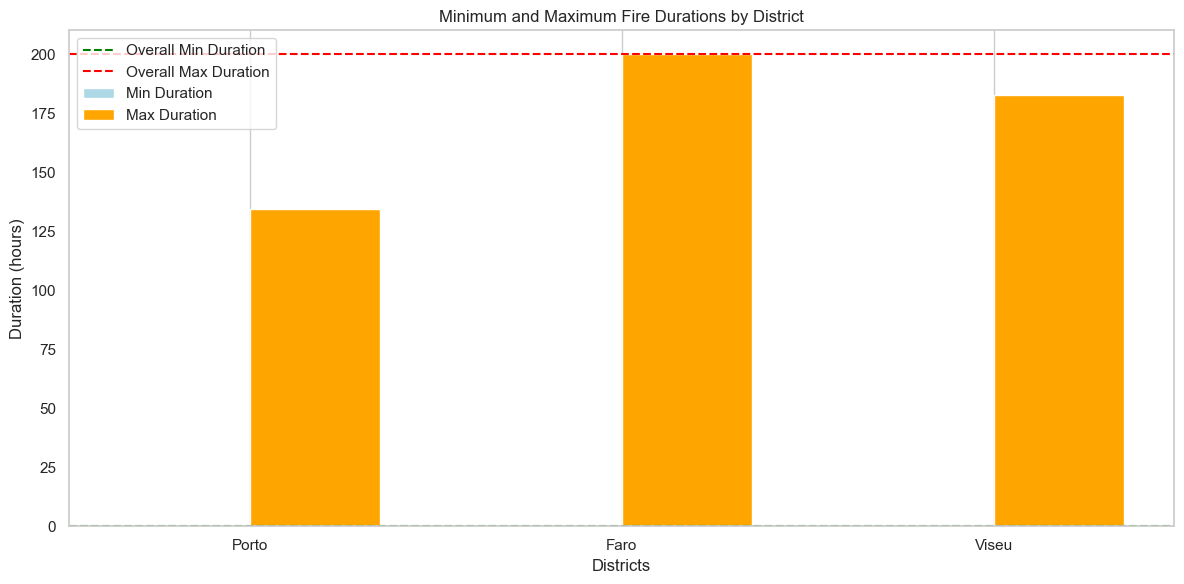

In [392]:
#Bar chart with the values calculated above - Overal min/max and min/max for the districts of interest

# Sample data for demonstration
data = {
    'Distrito': ['Porto', 'Faro', 'Viseu'],
    'Min_Duration': [0.02, 0.05, 0.02],  
    'Max_Duration': [134.55, 200.30, 182.85]  
}

# Convert to DataFrame
min_max_duration_per_district = pd.DataFrame(data)

# Sample data for overall min and max durations
overall_min_duration = 0.02  
overall_max_duration = 200.30  

# Creating a bar chart
plt.figure(figsize=(12, 6))

# Bar chart for district min and max durations
bar_width = 0.35
x = range(len(min_max_duration_per_district['Distrito']))

# Plotting min and max for districts
plt.bar(x, min_max_duration_per_district['Min_Duration'], width=bar_width, label='Min Duration', color='lightblue', align='center')
plt.bar([i + bar_width for i in x], min_max_duration_per_district['Max_Duration'], width=bar_width, label='Max Duration', color='orange', align='center')

# Adding overall min and max durations as lines
plt.axhline(y=overall_min_duration, color='green', linestyle='--', label='Overall Min Duration')
plt.axhline(y=overall_max_duration, color='red', linestyle='--', label='Overall Max Duration')

# Customizing the plot
plt.xticks([i + bar_width / 2 for i in x], min_max_duration_per_district['Distrito'])
plt.title('Minimum and Maximum Fire Durations by District')
plt.xlabel('Districts')
plt.ylabel('Duration (hours)')
plt.legend()
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

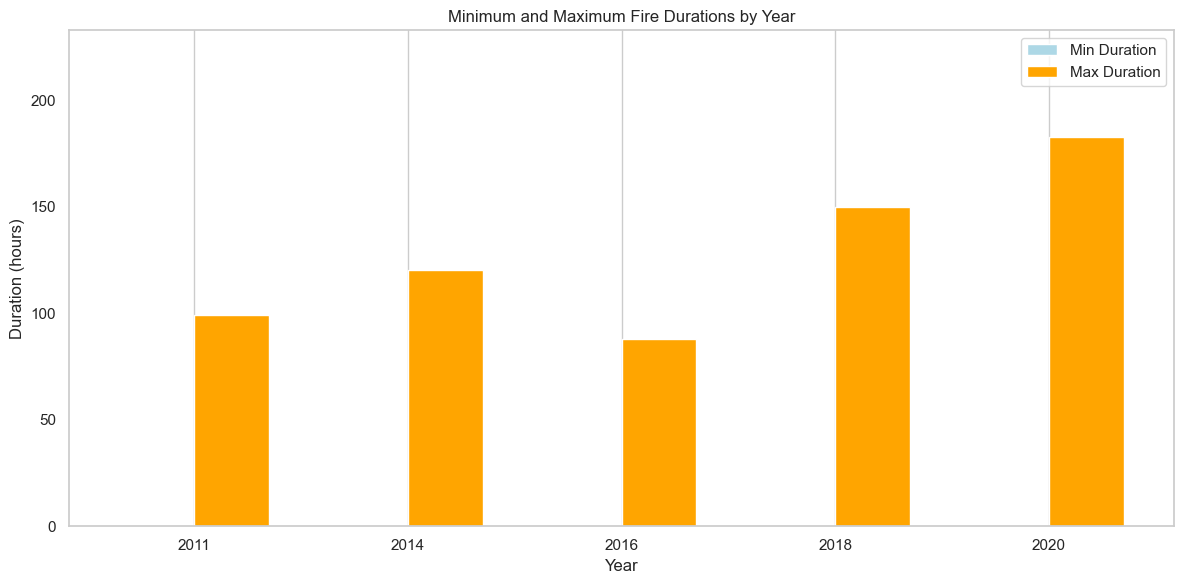

In [418]:
#Bar chart with min/max per year (2011, 2014, 2016, 2018, and 2020)

# Data for minimum and maximum fire durations per year INCLUDING 2014 and 2018
data = {
    'Year': [2011, 2014, 2016, 2018, 2020],  # Include 2018 in the year list
    'Min_Duration': [0.08, 0.02, 0.02, 0.03, 0.03],  # Add a minimum duration value for 2018 
    'Max_Duration': [99.03, 120.50, 87.85, 150.00, 182.85]  # Add a maximum duration value for 2018
}

# Convert to DataFrame
min_max_duration_per_year = pd.DataFrame(data)

# Creating a bar chart
plt.figure(figsize=(12, 6))

# Bar width
bar_width = 0.35
x = range(len(min_max_duration_per_year['Year']))

# Plotting min and max for each year
plt.bar(x, min_max_duration_per_year['Min_Duration'], width=bar_width, label='Min Duration', color='lightblue', align='center')
plt.bar([i + bar_width for i in x], min_max_duration_per_year['Max_Duration'], width=bar_width, label='Max Duration', color='orange', align='center')

# Customizing the plot
plt.xticks([i + bar_width / 2 for i in x], min_max_duration_per_year['Year'])
plt.title('Minimum and Maximum Fire Durations by Year')
plt.xlabel('Year')
plt.ylabel('Duration (hours)')

# Adjust the y-axis limit dynamically based on data
plt.ylim(0, max(min_max_duration_per_year['Max_Duration']) + 50)

plt.legend()
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

<div style="text-align: justify;">
As we can see, <strong>Max</strong> and <strong>Min</strong> are easy to understand, are quick to computate, give us a sense of the data range, and somehow give us a sense of data validation, helping to identify some clear errors the data collection had.
</div>

<div style="text-align: justify;">
However, <strong>Max</strong> and <strong>Min</strong> are very sensitivity to Outliers, aren't robust in a statistical context, bring some information but limited one. The range provided by the <strong>Max</strong> and <strong>Min</strong> gives context, but are limited for inference.
</div>

### Median

<div style="text-align: justify;">
We saw Mean is a measure that considers all values in the dataset, particularly when the data is symmetrically distributed without outliers. Nevertheless, the <strong>Median</strong> is more robust to outliers as it is less sensitive and represents the middle value. In this case:
</div>

In [395]:
#This code calculates the overall median number of fires as well as the median number of fires for each specified district.

# Calculate the median of total fires across all data (Num_IncendiosRurais)
total_median_fires = datasets['Estatisticas_PortugalContinent']['Num_IncendiosRurais'].median()
print(f"Median of total fires overall: {total_median_fires}")
print()

# Calculate the median number of fires for each district
districts_of_interest = ['Porto', 'Viseu', 'Faro']
district_medians = {}

for district in districts_of_interest:
    district_data = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'].str.title() == district]
    median_fires = district_data['Num_IncendiosRurais'].median()
    district_medians[district] = median_fires

# Print the median fires per district
print("Median of fires per district:")
for district, median in district_medians.items():
    print(f"{district}: {median}")

Median of total fires overall: 22067.5

Median of fires per district:
Porto: 4729.0
Viseu: 1857.0
Faro: 354.0


<div style="text-align: justify;">
There are some differences between the median and mean values, although they are not very significant. Additionally, the median figure for total fires overall indicates that, across the entire dataset, half of the time, the recorded number of wildfires is less than or equal to 22,067.5. This provides a general sense of wildfire frequency throughout the dataset and establishes a benchmark for comparing individual districts.
</div>

### Variance

Following this primary descriptive scenario, the dispersion of data is crucial to be understood as well.

<strong>Variance</strong> tells us how data points spread out around the mean. In other words, Variance measures the average squared deviation of data points from the mean, indicating how spread out the data is.

In [452]:
#This code calculates the variance of fire durations for each district, and rounds these values to two decimal places.

# Normalize the 'Distrito' column in the SGIF_2011_2020 dataset to handle case sensitivity
datasets['SGIF_2011_2020']['Distrito'] = datasets['SGIF_2011_2020']['Distrito'].str.strip().str.title()

# Filter the SGIF_2011_2020 dataset for the districts of interest
filtered_fires = datasets['SGIF_2011_2020'][datasets['SGIF_2011_2020']['Distrito'].isin(districts_of_interest)]

# Calculate variance of fire duration per district
variance_per_district = filtered_fires.groupby('Distrito')['Duracao_Horas'].var().reset_index()

# Round the variance to 2 decimal places
variance_per_district['Duracao_Horas'] = variance_per_district['Duracao_Horas'].round(2)

# Print the variance for each district
print("Variance of Fire Duration per District:")
for index, row in variance_per_district.iterrows():
    print(f"{row['Distrito']} - Variance: {row['Duracao_Horas']} hours²") 

Variance of Fire Duration per District:
Faro - Variance: 32.71 hours²
Porto - Variance: 7.66 hours²
Viseu - Variance: 25.69 hours²


<div style="text-align: justify;">
Comparing the 3 districts, this indicates a relatively high degree of variability in fire durations in the district of Faro (on average, fire durations in Faro vary by about 5.72 hours from the mean duration), a lower degree of variability in the district of Porto (on average, fire durations in Porto deviate by about 2.77 hours from the mean), and a moderate degree of variability in the district of Viseu (on average, vary by about 5.07 hours from the mean).
</div>

The following scatter plot shows how can be visualized the deviation from the mean per district:

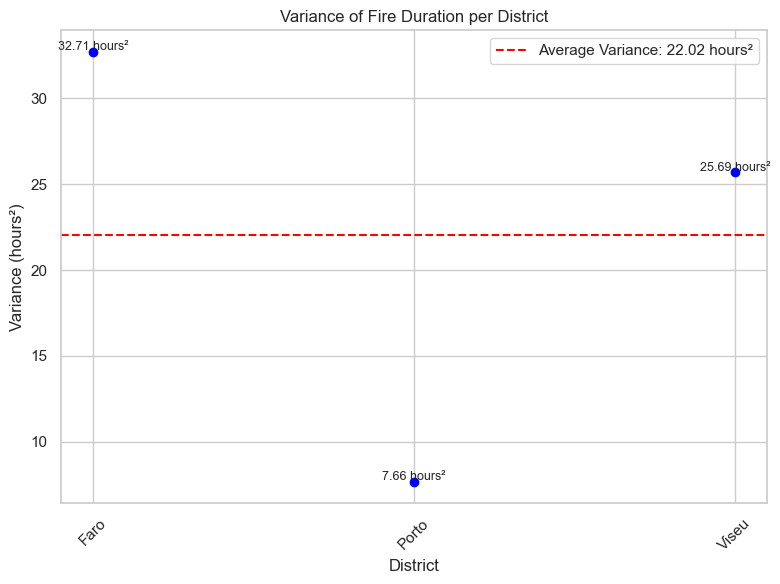

In [420]:
#Scatter plot showing the values calculated above about the deviation from the mean

# Calculate the average variance
average_variance = variance_stddev_per_district['var'].mean()

# Scatter plot for Variance of Fire Duration per District
plt.figure(figsize=(8, 6))
plt.scatter(variance_stddev_per_district['Distrito'], variance_stddev_per_district['var'], color='blue')

# Add labels for each district
for i, row in variance_stddev_per_district.iterrows():
    plt.text(row['Distrito'], row['var'] + 0.1, f"{row['var']} hours²", ha='center', fontsize=9)

# Add horizontal line for average variance
plt.axhline(y=average_variance, color='red', linestyle='--', label=f'Average Variance: {average_variance:.2f} hours²')

# Customize the plot
plt.title("Variance of Fire Duration per District")
plt.xlabel("District")
plt.ylabel("Variance (hours²)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

### Kernel Density Estimation (KDE)

<div style="text-align: justify;">
The following set of plots highlights the density of occurrences at different duration levels, and allows for a visual comparison of how fire durations vary among these districts. Each plot presents the estimated density of fire durations, providing insights into the typical duration of fires and any patterns or differences between the districts.
</div>

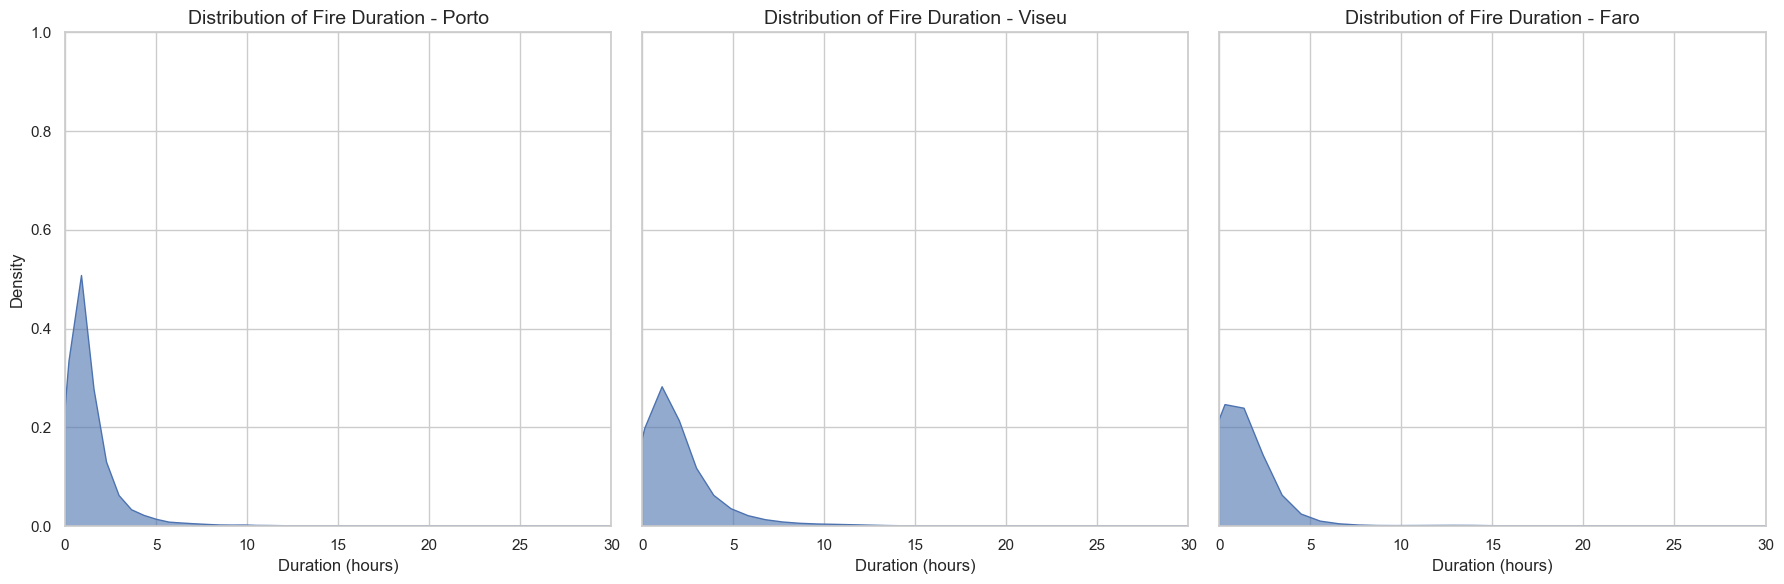

In [443]:
#This code displays a grid of three subplots to show the kernel density estimation (KDE) of fire duration distributions 
# for the specified districts, ensuring shared y-axis scaling and properly labeled axes.

# Set up a grid of 1 row and 3 columns for separate plots of each district
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot the distribution for each district in its own subplot
for i, district in enumerate(districts_of_interest):
    district_data = filtered_fires[filtered_fires['Distrito'] == district]

    # Use seaborn's kdeplot in the respective subplot
    sns.kdeplot(district_data['Duracao_Horas'], fill=True, alpha=0.6, ax=axes[i])

    # Set titles and labels for each subplot
    axes[i].set_title(f'Distribution of Fire Duration - {district}', fontsize=14)
    axes[i].set_xlabel('Duration (hours)', fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

    # Set maximum limits for x and y axes
    axes[i].set_xlim(0, 30)  # Set x-axis limit to 30
    axes[i].set_ylim(0, 1.0)  # Set y-axis limit to 1.0

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<div style="text-align: justify;">
The following sequence of plot highlights the same density of occurrences at different duration levels, per district and per years of interest, which could be useful for comparison.
</div>

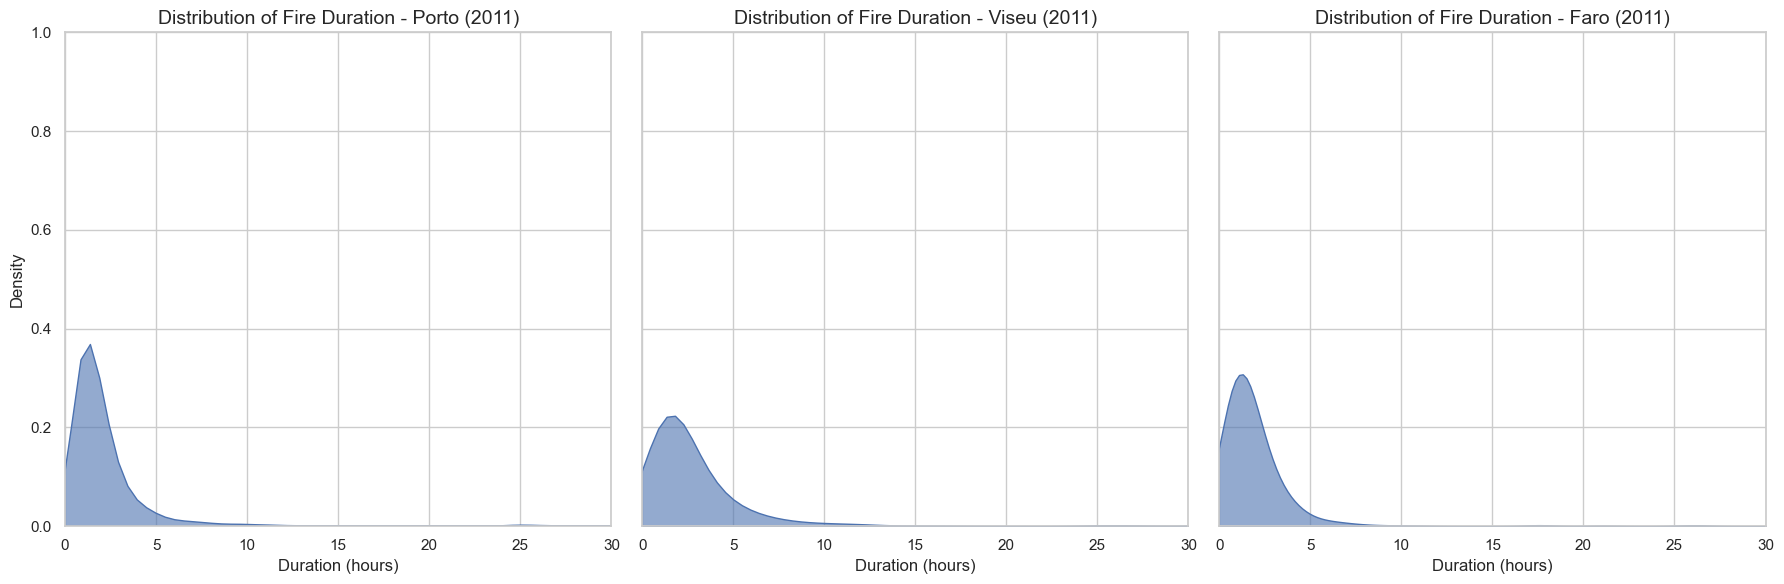

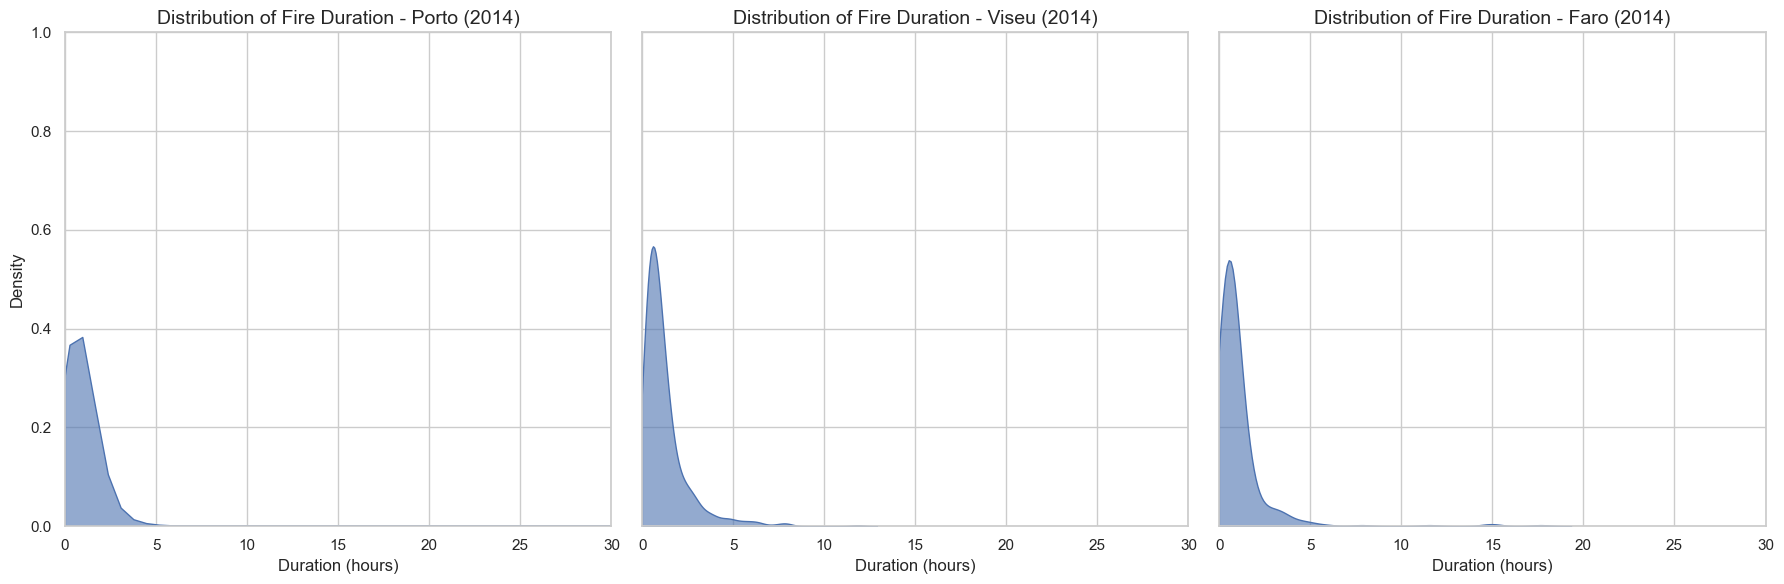

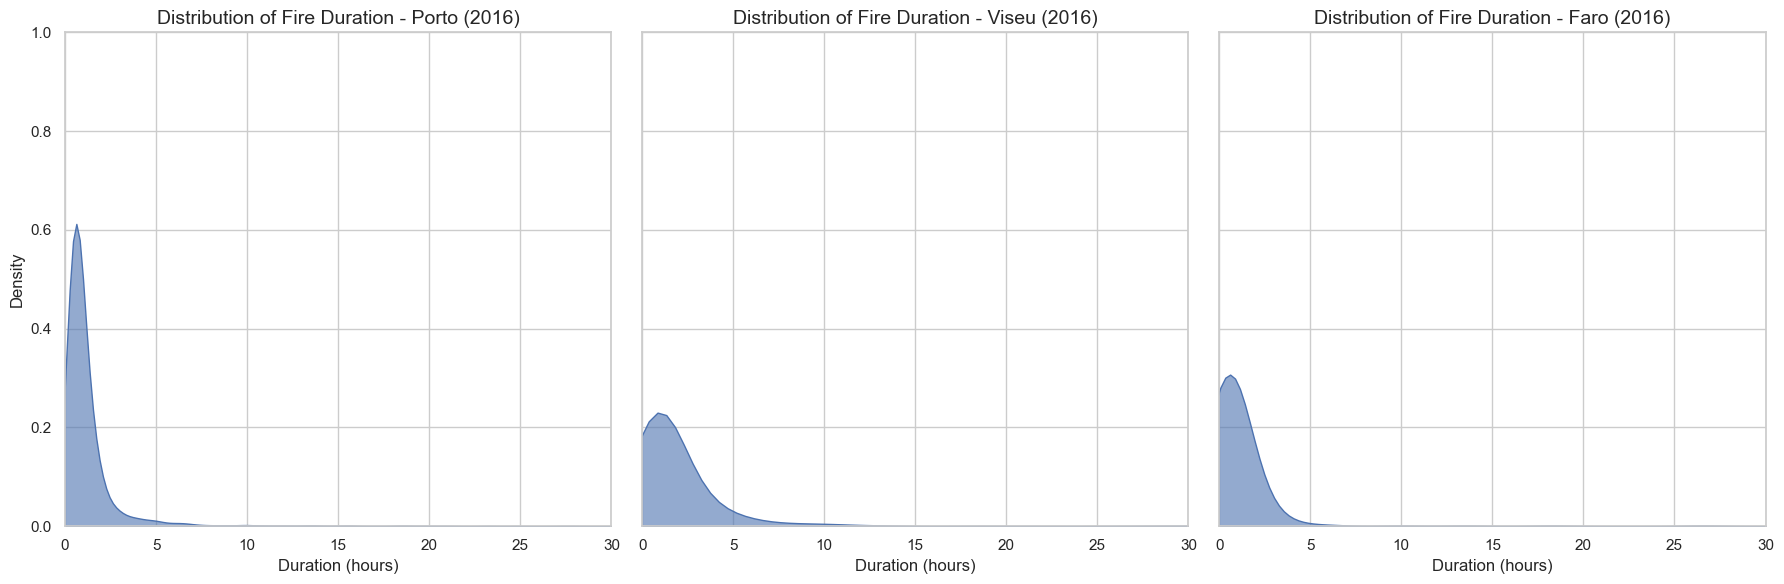

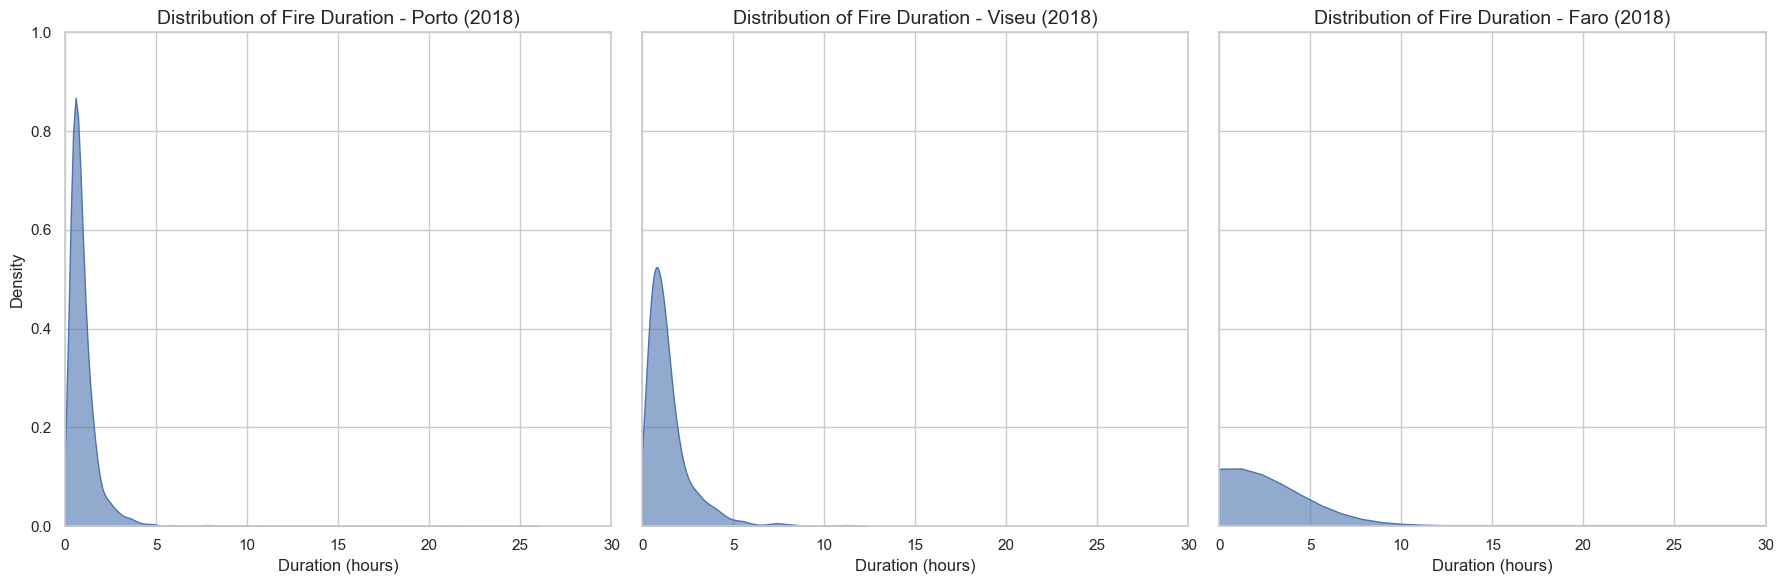

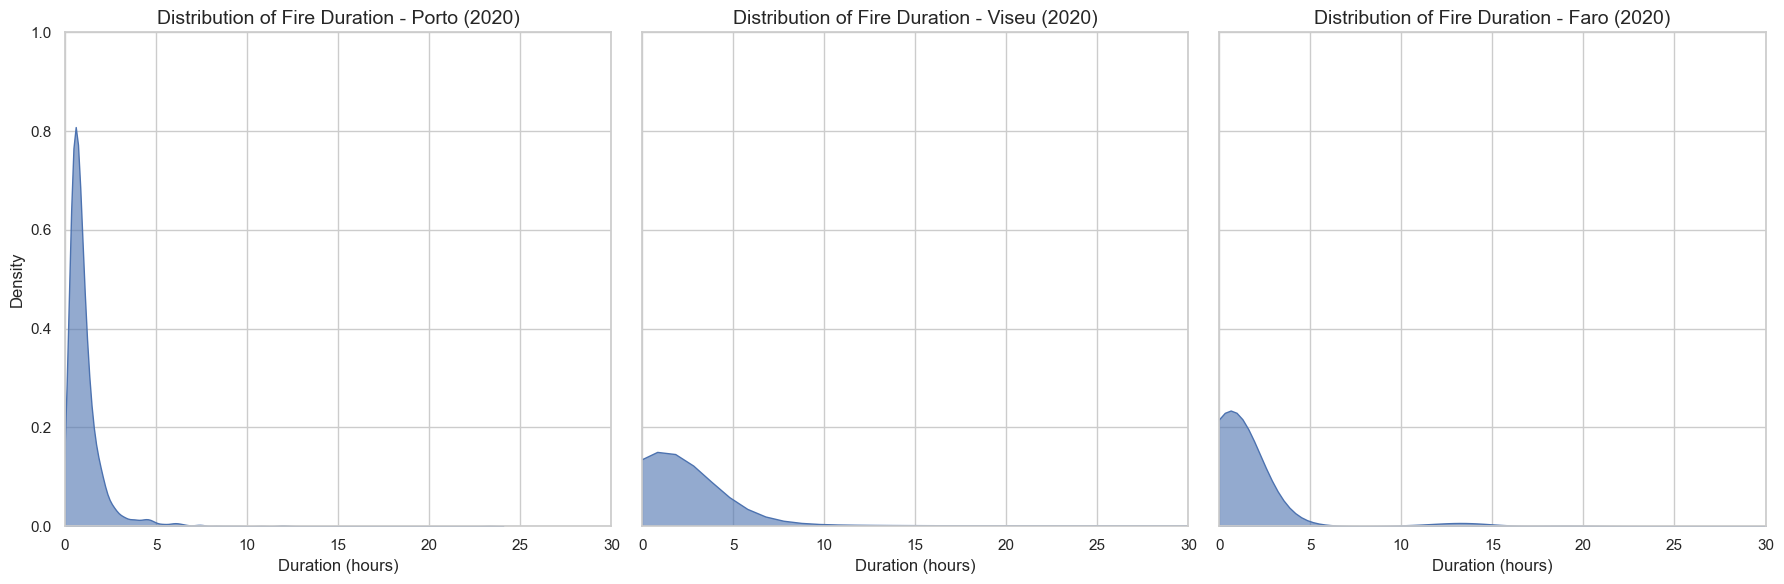

In [481]:
#This code displays a sequence of plots to show the kernel density estimation (KDE) of fire duration distributions 
# for the specified districts, for the years of interest

# Specify the years of interest
years_of_interest = [2011, 2014, 2016, 2018, 2020]

# Specify the districts of interest
districts_of_interest = ['Porto', 'Viseu', 'Faro']

# Loop through each year
for year in years_of_interest:
    # Filter data for the current year
    filtered_year_data = filtered_fires[filtered_fires['Ano'] == year]

    # Set up a grid of 1 row and 3 columns for separate plots of each district
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Plot the distribution for each district in its own subplot
    for i, district in enumerate(districts_of_interest):
        district_data = filtered_year_data[filtered_year_data['Distrito'] == district]

        # Use seaborn's kdeplot in the respective subplot
        sns.kdeplot(district_data['Duracao_Horas'], fill=True, alpha=0.6, ax=axes[i])

        # Set titles and labels for each subplot
        axes[i].set_title(f'Distribution of Fire Duration - {district} ({year})', fontsize=14)
        axes[i].set_xlabel('Duration (hours)', fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)

        # Set maximum limits for x and y axes
        axes[i].set_xlim(0, 30)  # Set x-axis limit to 30
        axes[i].set_ylim(0, 1.0)  # Set y-axis limit to 1.0 

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

<div style="text-align: justify;">
In the following KDE plot, the density represents the relative likelihood of observing a particular number of fires. It's like a smoothed histogram where higher peaks indicate a greater concentration of data points. So, a higher density at a certain point on the x-axis (number of fires) means there's a greater probability of observing that number of fires in the district.
</div>

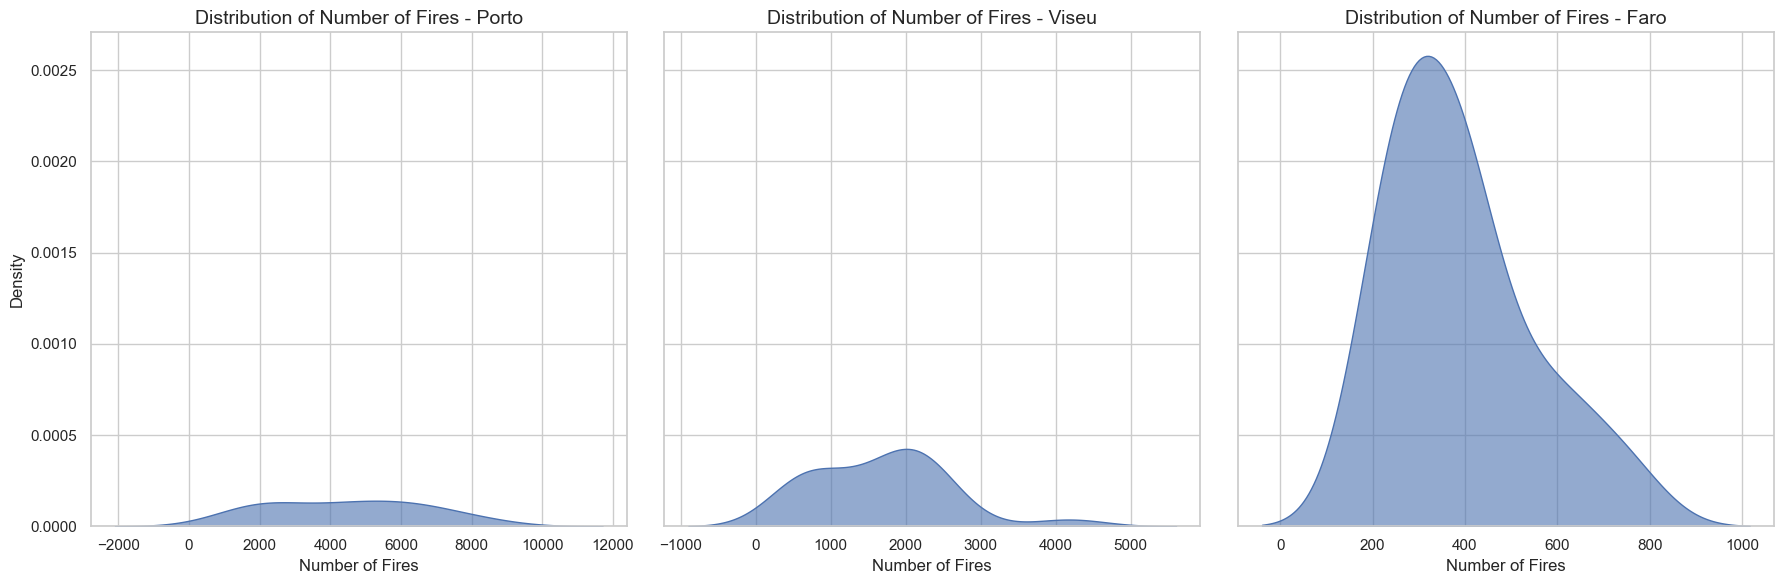

In [485]:
#This code displays KDE plots that show the kernel density estimation (KDE) of number of fires distributions 
# for the specified districts

# Specify the districts of interest
districts_of_interest = ['Porto', 'Viseu', 'Faro']

# Filter data for the districts of interest
filtered_data = datasets['Estatisticas_Distrito'][
    datasets['Estatisticas_Distrito']['Distrito'].isin(districts_of_interest)
]

# Set up a grid of 1 row and 3 columns for separate plots of each district
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot the distribution for each district in its own subplot
for i, district in enumerate(districts_of_interest):
    district_data = filtered_data[filtered_data['Distrito'] == district]

    # Use seaborn's kdeplot in the respective subplot (for number of fires)
    sns.kdeplot(district_data['Num_IncendiosRurais'], fill=True, alpha=0.6, ax=axes[i])  

    # Set titles and labels for each subplot
    axes[i].set_title(f'Distribution of Number of Fires - {district}', fontsize=14)
    axes[i].set_xlabel('Number of Fires', fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<div style="text-align: justify;">
This code creates a visual representation of how long fires last, and how likely is it to occur a fire, in three different districts (Porto, Viseu, and Faro) using something called kernel density estimation (KDE). However, KDE is for Describing Existing Data: Kernel Density Estimation is a technique for visualizing the current distribution of the data. It doesn't inherently have any predictive capabilities. And that's why it could be relevant to have this insight here
</div>

### Visualization

<div style="text-align: justify;">
As we know, variance and standard deviation tell us how data points are spread around the mean. These measures help us detect patterns and can indicate the presence of outliers or a diverse range of data points. However, the <strong>Visualization</strong> aspect allows for quicker and clearer identification of key insights and plays an essential role in understanding the data.
</div>

### Standard Deviation

<strong>Standard Deviation</strong> is the square root of the Variance, providing a more interpretable measure of data spread in the same units as the original data.

Here's the Standard Deviation calculation for the following variables: Number of Fires per relevant District, and Fire Duration:

In [474]:
#This code calculates the Standard Deviation of number of fires for each district, and rounds these values to two decimal places.

# Calculate the standard deviation of the number of fires per district
fire_std_dev = datasets['Estatisticas_Distrito'].groupby('Distrito')['Num_IncendiosRurais'].std()

# Filter for the districts of interest
fire_std_dev_filtered = fire_std_dev[['Porto', 'Viseu', 'Faro']].round(2)  # Round to 2 decimal places

# Print the standard deviation for each district without the dtype information
print("Standard Deviation of Number of Fires per District:")
for district, std_dev in fire_std_dev_filtered.items():
    print(f"{district}: {std_dev}")

Standard Deviation of Number of Fires per District:
Porto: 2158.13
Viseu: 886.44
Faro: 155.14


In [467]:
#This code calculates the Standard Deviation of fire durations for each district, and rounds these values to two decimal places.

# Normalize the 'Distrito' column in the SGIF_2011_2020 dataset to handle case sensitivity
datasets['SGIF_2011_2020']['Distrito'] = datasets['SGIF_2011_2020']['Distrito'].str.strip().str.title()

# Filter the SGIF_2011_2020 dataset for the districts of interest
filtered_fires = datasets['SGIF_2011_2020'][datasets['SGIF_2011_2020']['Distrito'].isin(districts_of_interest)]

# Calculate standard deviation of fire duration per district
std_dev_per_district = filtered_fires.groupby('Distrito')['Duracao_Horas'].std().reset_index()

# Round the standard deviation to 2 decimal places
std_dev_per_district['Duracao_Horas'] = std_dev_per_district['Duracao_Horas'].round(2)

# Print the standard deviation for each district
print("Standard Deviation of Fire Duration per District:")
for index, row in std_dev_per_district.iterrows():
    print(f"{row['Distrito']} - Standard Deviation: {row['Duracao_Horas']} hours")

Standard Deviation of Fire Duration per District:
Faro - Standard Deviation: 5.72 hours
Porto - Standard Deviation: 2.77 hours
Viseu - Standard Deviation: 5.07 hours


Here's another plot, now regarding the <strong>Standard Deviation</strong> of Fire Duration per relevant District:

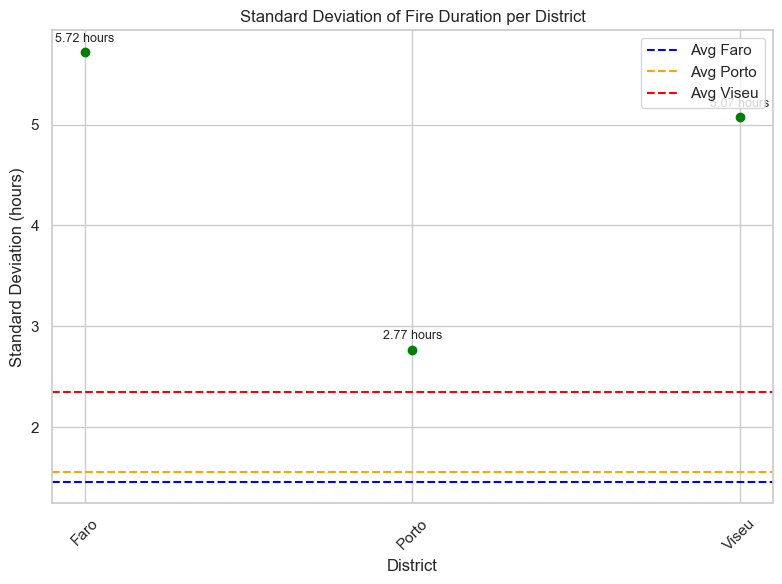

In [360]:
# Scatter plot for Standard Deviation of Fire Duration per District

# Calculate the average fire duration for each district
average_durations = filtered_fires.groupby('Distrito')['Duracao_Horas'].mean().reset_index()
average_durations.columns = ['Distrito', 'Average_Duration']

# Define a color map for the districts
colors = {
    'Faro': 'blue',
    'Porto': 'orange',
    'Viseu': 'red'
}

# Scatter plot for Standard Deviation of Fire Duration per District
plt.figure(figsize=(8, 6))
plt.scatter(variance_stddev_per_district['Distrito'], variance_stddev_per_district['std'], color='green')

# Add labels for each district
for i, row in variance_stddev_per_district.iterrows():
    plt.text(row['Distrito'], row['std'] + 0.1, f"{row['std']} hours", ha='center', fontsize=9)

# Add average duration lines with different colors
for i, row in average_durations.iterrows():
    plt.axhline(y=row['Average_Duration'], color=colors[row['Distrito']], linestyle='--', label=f"Avg {row['Distrito']}")

# Customize the plot
plt.title("Standard Deviation of Fire Duration per District")
plt.xlabel("District")
plt.ylabel("Standard Deviation (hours)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()

# Add legend
plt.legend()

# Display the plot
plt.show()

Here's another plot about Fire Duration distribution with Standard Deviation per relevant district:

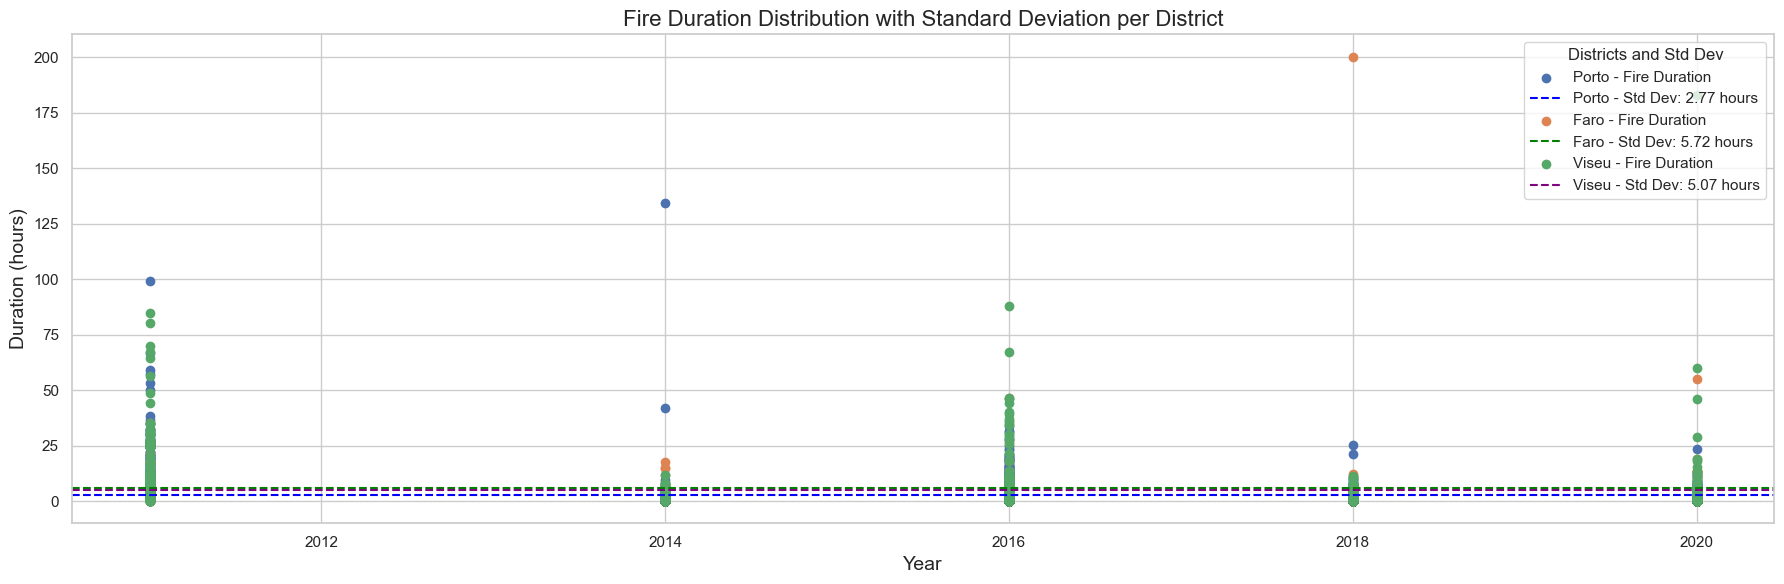

In [421]:
#Plot for Fire Duration distribution with Standard Deviation per relevant district:

# Filter for the districts of interest: Porto, Faro, and Viseu
districts_of_interest = ['Porto', 'Faro', 'Viseu']
filtered_fires = datasets['SGIF_2011_2020'][datasets['SGIF_2011_2020']['Distrito'].isin(districts_of_interest)]

# Calculate standard deviation per district
std_per_district = filtered_fires.groupby('Distrito')['Duracao_Horas'].std().reset_index()

# Define colors for each district's standard deviation line
std_colors = {'Porto': 'blue', 'Faro': 'green', 'Viseu': 'purple'}

# Set up the figure
plt.figure(figsize=(18, 6))

# Plot scatter and standard deviation line for each district
for i, district in enumerate(districts_of_interest):
    district_data = filtered_fires[filtered_fires['Distrito'] == district]
    district_std = std_per_district[std_per_district['Distrito'] == district]['Duracao_Horas'].values[0]
    
    # Create scatter plot for the fire duration distribution in the district
    plt.scatter(district_data['Ano'], district_data['Duracao_Horas'], label=f'{district} - Fire Duration')
    
    # Add a horizontal line for the standard deviation in the district's color
    plt.axhline(y=district_std, color=std_colors[district], linestyle='--', label=f'{district} - Std Dev: {district_std:.2f} hours')

# Customize the plot
plt.title('Fire Duration Distribution with Standard Deviation per District', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Duration (hours)', fontsize=14)
plt.legend(title='Districts and Std Dev', loc='upper right')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

The following plot shows the Standard Deviation of Fire Frequency per District of interest, and an Average Fire Frequency Standard Deviation:

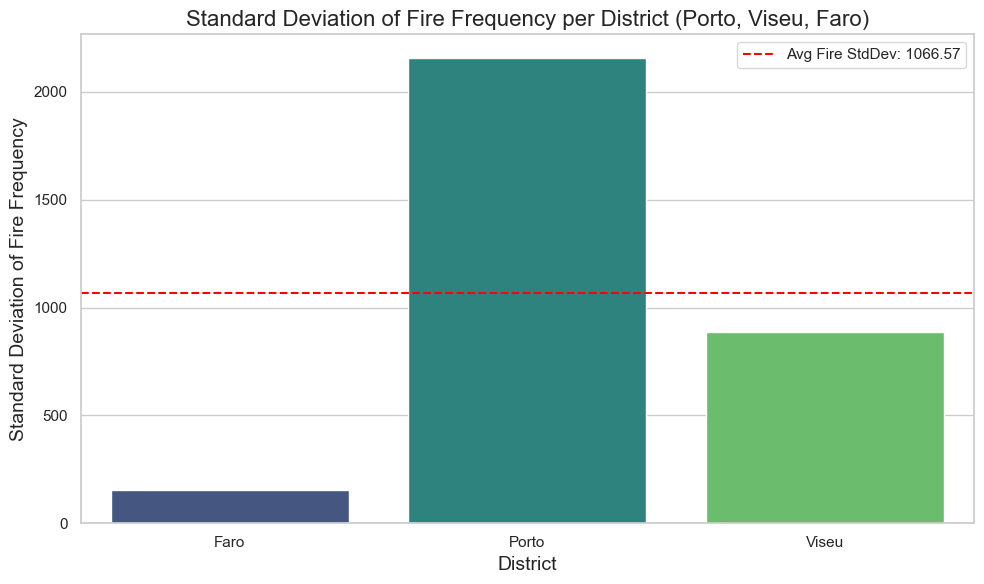

In [466]:
#Scatter plot of Number of Fires Standard Deviation per district of interest

# Calculate the standard deviation of the number of fires per district
fire_std_dev = datasets['Estatisticas_Distrito'].groupby('Distrito')['Num_IncendiosRurais'].std().reset_index()
fire_std_dev.columns = ['Distrito', 'Fire_StdDev']

# Filter for the districts of interest
fire_std_dev_filtered = fire_std_dev[fire_std_dev['Distrito'].isin(['Porto', 'Viseu', 'Faro'])]

# Calculate the average standard deviation for the 3 districts
avg_fire_std_dev = fire_std_dev_filtered['Fire_StdDev'].mean()

# Plot the standard deviation as a bar plot with the average line
plt.figure(figsize=(10, 6))
sns.barplot(data=fire_std_dev_filtered, x='Distrito', y='Fire_StdDev', palette='viridis')  # Changed to barplot

# Add average line
plt.axhline(y=avg_fire_std_dev, color='red', linestyle='--', 
            label=f'Avg Fire StdDev: {avg_fire_std_dev:.2f}')

# Customize the plot
plt.title('Standard Deviation of Fire Frequency per District (Porto, Viseu, Faro)', fontsize=16)
plt.xlabel('District', fontsize=14)
plt.ylabel('Standard Deviation of Fire Frequency', fontsize=14)
plt.grid(True, axis='y')  # Show grid only on y-axis
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Still on the <strong>Visualization</strong> part, here's another plot about Fire Frequency vs Fire Duration Standard Deviation:

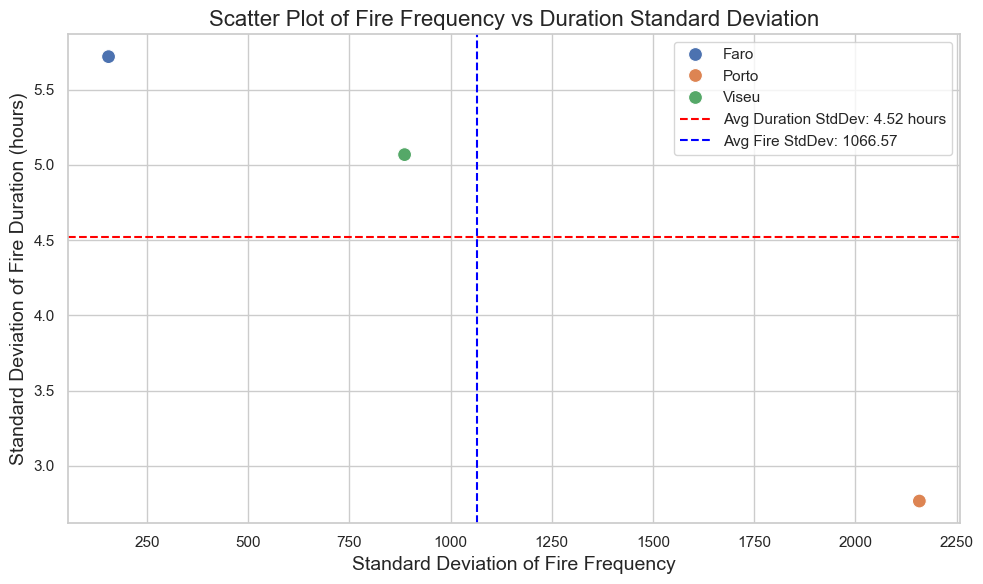

In [458]:
#Scatter plot of Fire Frequency vs Fire Duration Standard Deviation per district of interest

# Calculate the standard deviation of the number of fires per district
fire_std_dev = datasets['Estatisticas_Distrito'].groupby('Distrito')['Num_IncendiosRurais'].std().reset_index()
fire_std_dev.columns = ['Distrito', 'Fire_StdDev']

# Calculate the standard deviation of fire duration per district
duration_std_dev = datasets['SGIF_2011_2020'].groupby('Distrito')['Duracao_Horas'].std().reset_index()
duration_std_dev.columns = ['Distrito', 'Duration_StdDev']

# Merge the two dataframes on Distrito
std_dev_df = pd.merge(fire_std_dev, duration_std_dev, on='Distrito')

# Calculate the average standard deviation values
avg_fire_std_dev = std_dev_df['Fire_StdDev'].mean()
avg_duration_std_dev = std_dev_df['Duration_StdDev'].mean()

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=std_dev_df, x='Fire_StdDev', y='Duration_StdDev', hue='Distrito', s=100)

# Add average lines
plt.axhline(y=avg_duration_std_dev, color='red', linestyle='--', label=f'Avg Duration StdDev: {avg_duration_std_dev:.2f} hours')
plt.axvline(x=avg_fire_std_dev, color='blue', linestyle='--', label=f'Avg Fire StdDev: {avg_fire_std_dev:.2f}')

# Customize the plot
plt.title('Scatter Plot of Fire Frequency vs Duration Standard Deviation', fontsize=16)
plt.xlabel('Standard Deviation of Fire Frequency', fontsize=14)
plt.ylabel('Standard Deviation of Fire Duration (hours)', fontsize=14)
plt.grid(True)
plt.legend()  # Show legend

# Show the plot
plt.tight_layout()
plt.show()

### **Starting to dig deeper**

### Fire Duration vs Frequency Across Districts Over Time (particular focus from 2017 onwards)

<div style="text-align: justify;">
Regarding the specific question of whether wildfire durations decreased after 2017, it’s possible to provide an initial overview based on descriptive statistics. There are a few bar charts that show trends by district.
</div>

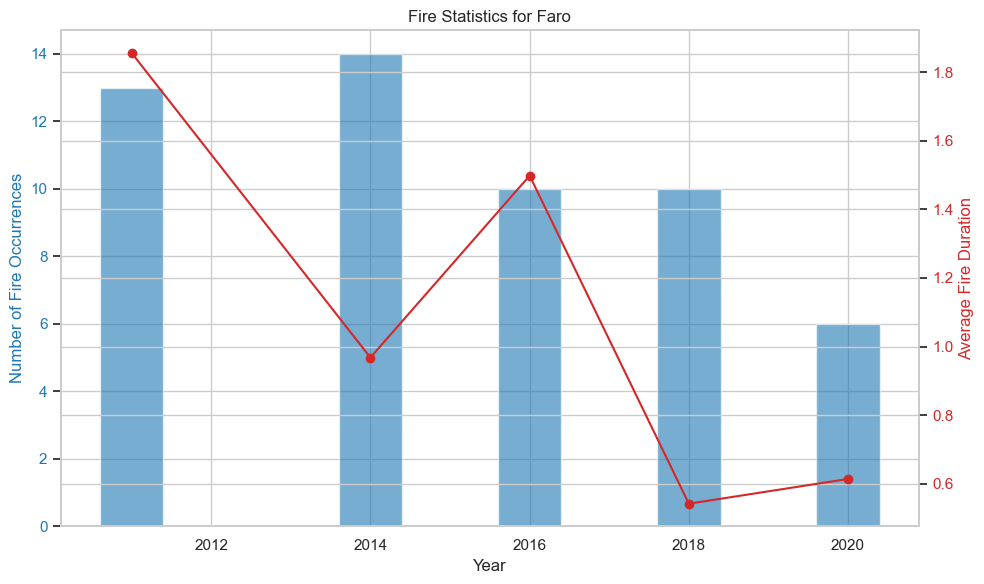

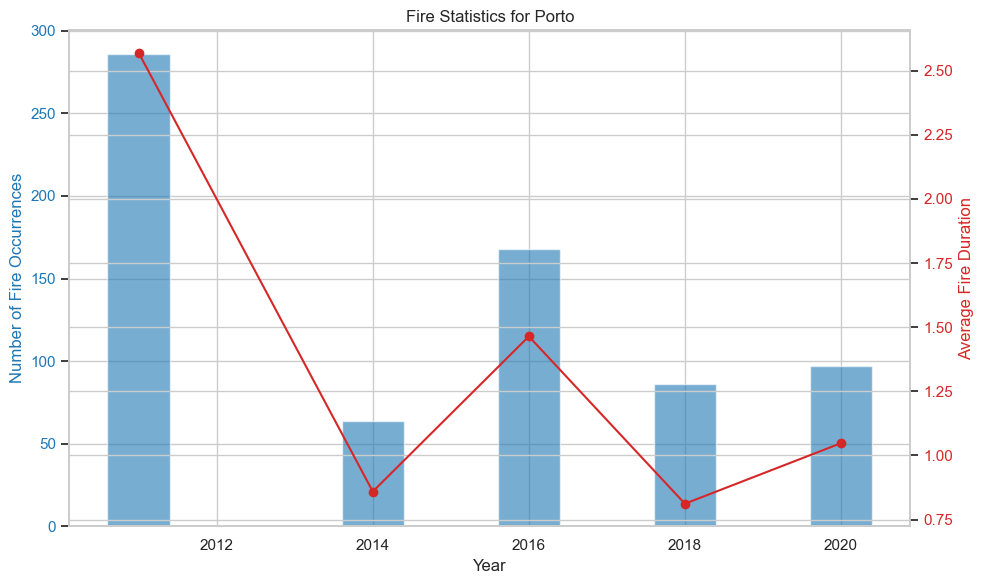

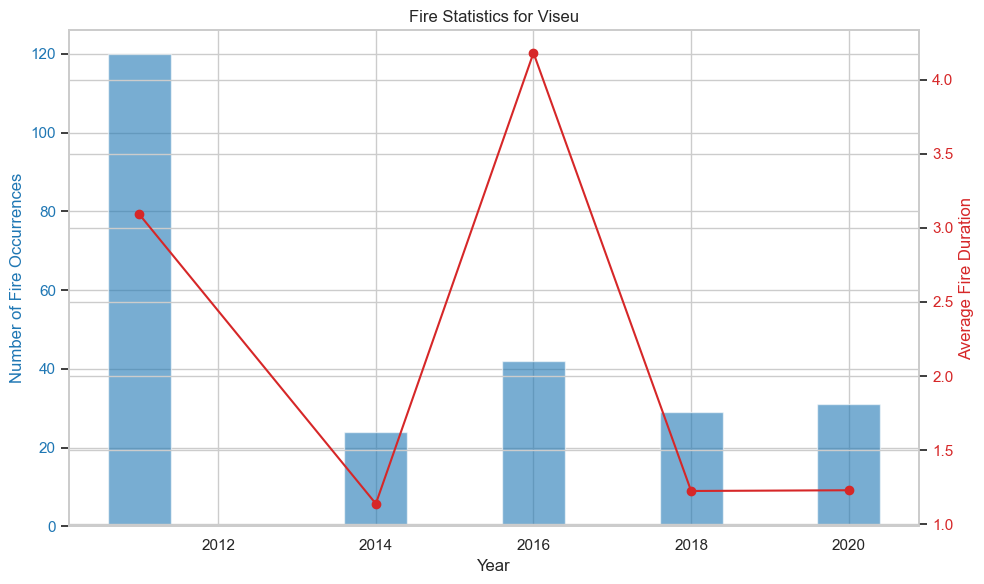

In [401]:
#This code samples 1,000 entries from the 'SGIF_2011_2020' dataset, 
# groups the sampled data by district and year to calculate the average fire duration and the number of fire occurrences, 
# and then creates a dual-axis bar and line plot for each district to visualize these statistics over time.

dataset_sample = datasets['SGIF_2011_2020'].sample(n=1000, random_state=999)
dataset_sample.sample(n=5, random_state=999)

# Group the data by district and year
df = dataset_sample
grouped = df.groupby(['Distrito', 'Ano']).agg(
    avg_fire_duration = ('Duracao_Horas', 'mean'),  # Average fire duration
    fire_occurrences = ('Duracao_Horas', 'count')   # Number of fire occurrences
).reset_index()

# Create a figure for plotting
regions = grouped['Distrito'].unique()

for region in regions:
    data_region = grouped[grouped['Distrito'] == region]
    
    # Create a new figure for each region
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar chart (left axis) - Number of fire occurrences
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Fire Occurrences', color=color)
    ax1.bar(data_region['Ano'], data_region['fire_occurrences'], color=color, alpha=0.6)
    ax1.tick_params(axis='y', labelcolor=color)

    # Right axis for average fire duration
    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Average Fire Duration', color=color)
    ax2.plot(data_region['Ano'], data_region['avg_fire_duration'], color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'Fire Statistics for {region}')
    fig.tight_layout()
    plt.show()  # This will display the graph for each region without the previous message

<div style="text-align: justify;">
The dual-axis plot presents fire statistics for different districts over the years. Specifically, it displays two key metrics: <br>

1. Number of Fire Occurrences (Bar Graph): Represented by blue bars on the left y-axis, this metric shows the total count of fire occurrences for each district in the specified years. Higher bars indicate more frequent fire incidents in that district for a given year.

2. Average Fire Duration (Line Graph): Illustrated by a red line on the right y-axis, this metric indicates the average duration of fires (in hours) for each district. The data points connected by the line represent the average duration for the corresponding years, allowing us to see trends in how long fires last over time.

By observing these graphs, we can see that the duration of fires has shown a tendency to decrease over the years, except for Faro, where we identified an increase from 2016 to 2020.
</div>

<div style="text-align: justify;">
Following the approach focused on a district-specific overview, here’s a grid that shows the difference in fires before and after the year 2017.
</div>

In [501]:
# Difference in number of fires before and after 2017

# Grouping by year and calculate the total number of fires
total_fires_by_year = datasets['Estatisticas_PortugalContinent'].groupby('Ano')['Num_IncendiosRurais'].sum().reset_index()

# Print total fires by year for reference
print("Total Fires by Year:")
print(total_fires_by_year)

# Set the total fires for 2017 as a reference
fires_2017 = total_fires_by_year[total_fires_by_year['Ano'] == 2017]['Num_IncendiosRurais'].values[0]

# Calculate the difference for subsequent years
total_fires_by_year['Difference'] = total_fires_by_year['Num_IncendiosRurais'] - fires_2017

# Print the differences to check for decreases
print("Difference from 2017:")
print(total_fires_by_year[['Ano', 'Difference']])

Total Fires by Year:
     Ano  Num_IncendiosRurais
0   2001                28915
1   2002                28993
2   2003                28087
3   2004                27829
4   2005                41689
5   2006                24243
6   2007                25133
7   2008                18958
8   2009                29783
9   2010                26113
10  2011                29782
11  2012                25352
12  2013                23129
13  2014                 9388
14  2015                19643
15  2016                16104
16  2017                21006
17  2018                12273
18  2019                10832
19  2020                 9619
20  2021                16372
21  2022                10390
22  2023                 7523
Difference from 2017:
     Ano  Difference
0   2001        7909
1   2002        7987
2   2003        7081
3   2004        6823
4   2005       20683
5   2006        3237
6   2007        4127
7   2008       -2048
8   2009        8777
9   2010        5107
10  20

<div style="text-align: justify;">
Now, the graph displaying the total number of fires per year, helps provide initial insights into whether the total number of wildfires has decreased since 2017.
</div>

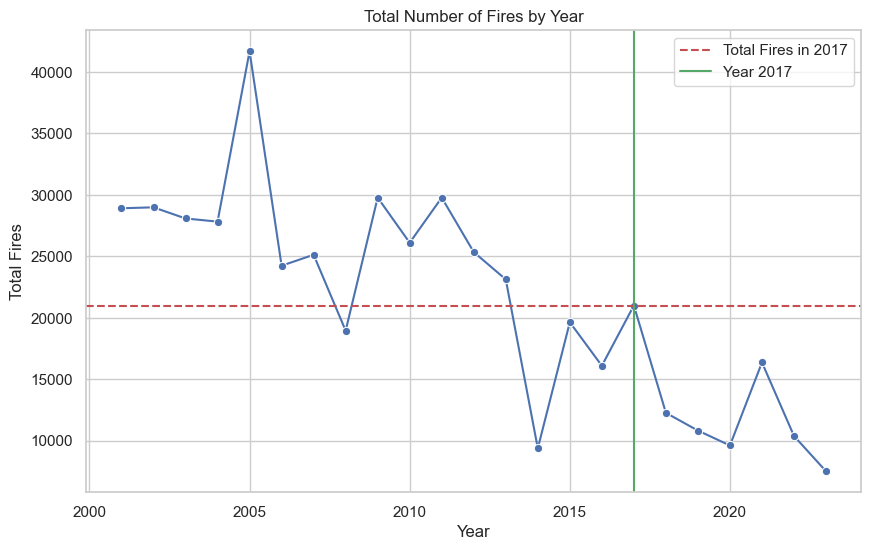

In [423]:
#Total number of fires per year (particular focus from 2017 onwards)

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_fires_by_year, x='Ano', y='Num_IncendiosRurais', marker='o')
plt.title('Total Number of Fires by Year')
plt.xlabel('Year')
plt.ylabel('Total Fires')
plt.axhline(y=fires_2017, color='r', linestyle='--', label='Total Fires in 2017')

# Add a vertical line at 2017
plt.axvline(x=2017, color='g', linestyle='-', label='Year 2017') 

plt.legend()
plt.grid(True)
plt.show()

The following graph shows the tendency of decrease is also noticeable regarding the duration of wildfires, in average:

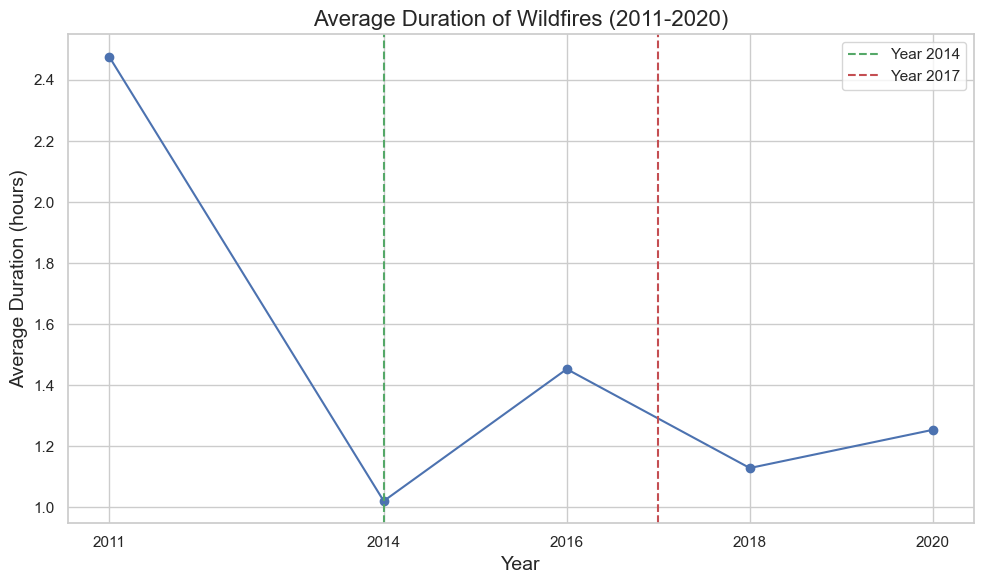

In [407]:
#Line graph about average duration of wild fires

# Step 1: Define the years of interest
years_of_interest = [2011, 2014, 2016, 2020]  # Include 2014 here
post_2017_years = [2018, 2019, 2020]  # Define years after 2017 for comparison

# Step 2: Calculate average fire duration per year
average_duration_per_year = datasets['SGIF_2011_2020'].groupby('Ano')['Duracao_Horas'].mean().reset_index()

# Step 3: Filter the data to only include relevant years
average_duration_per_year = average_duration_per_year[average_duration_per_year['Ano'].isin(years_of_interest + post_2017_years)]

# Step 4: Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(average_duration_per_year['Ano'], average_duration_per_year['Duracao_Horas'], marker='o', linestyle='-')

# Step 5: Customize the plot
plt.title('Average Duration of Wildfires (2011-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Duration (hours)', fontsize=14)
plt.xticks(average_duration_per_year['Ano'])  # Ensure all years are shown on the x-axis
plt.grid(True)

# Highlight the years 2014 and 2017
plt.axvline(x=2014, color='g', linestyle='--', label='Year 2014')  # Highlight 2014
plt.axvline(x=2017, color='r', linestyle='--', label='Year 2017')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Correlation analysis

<div style="text-align: justify;">
To better understand the relationship between the two variables—fire duration and fire frequency—a correlation analysis can provide insights that transition us from a descriptive scenario to a more inferential one. We believe this will offer a useful overview in this regard.
</div>

<div style="text-align: justify;">
Here, we will use the Spearman's Rank correlation as we already seen there are outliers. This correlation might be suitable for a not normally distributed scenario, if it happens.
</div>

In [408]:
#This code computes the Spearman correlation coefficient to assess the relationship between average fire duration and total fires in each district.

# Step 1: Prepare average fire duration and total fires for correlation

# Average fire duration per district
average_fire_duration_per_district = filtered_fires.groupby('Distrito')['Duracao_Horas'].mean().reset_index()
average_fire_duration_per_district = average_fire_duration_per_district.rename(columns={"Duracao_Horas": "Avg_Fire_Duration"})

# Total number of fires per district
total_fires_per_district = datasets['Estatisticas_Distrito'].groupby('Distrito')['Num_IncendiosRurais'].sum().reset_index()
total_fires_per_district = total_fires_per_district.rename(columns={"Num_IncendiosRurais": "Total_Fires"})

# Step 2: Merge data for correlation
correlation_data = pd.merge(average_fire_duration_per_district, total_fires_per_district, on='Distrito')

# Step 3: Calculate Spearman correlation
spearman_corr, p_value = spearmanr(correlation_data['Avg_Fire_Duration'], correlation_data['Total_Fires'])

# Print the results
print("Spearman Correlation Coefficient:", spearman_corr)
#print("P-value:", p_value)

Spearman Correlation Coefficient: 0.5


<div style="text-align: justify;">
As this Correlation Coefficient is 0.5, and it ranges from -1 to 1, the value 0.5 suggests a moderate positive correlation between average fire duration and the total number of fires. 
</div>

<div style="text-align: justify;">
This means that, in general, as the average duration of fires increases, the number of fires tends to increase as well. This slight tendency (moderate positive), in accordance with the remaining scenario described previously in this phase, helps to introduce this analysis into a more inferential part.
</div>

In [498]:
#This code creates a scatter plot to visualize the correlation between average fire duration (in hours) and the total number of fires per district

# Step 1: Prepare average fire duration and total fires for correlation
average_fire_duration_per_district = filtered_fires.groupby('Distrito')['Duracao_Horas'].mean().reset_index()
average_fire_duration_per_district = average_fire_duration_per_district.rename(columns={"Duracao_Horas": "Avg_Fire_Duration"})

# Total number of fires per district
total_fires_per_district = datasets['Estatisticas_Distrito'].groupby('Distrito')['Num_IncendiosRurais'].sum().reset_index()
total_fires_per_district = total_fires_per_district.rename(columns={"Num_IncendiosRurais": "Total_Fires"})

# Step 2: Merge data for correlation
correlation_data = pd.merge(average_fire_duration_per_district, total_fires_per_district, on='Distrito')

# Step 3: Calculate Spearman correlation
spearman_corr, p_value = spearmanr(correlation_data['Avg_Fire_Duration'], correlation_data['Total_Fires'])

# Print the results
print("Spearman Correlation Coefficient:", spearman_corr)
print("P-value:", p_value)

Spearman Correlation Coefficient: 0.5
P-value: 0.6666666666666667


<div style="text-align: justify;">
In order to complement the descriptive analysis, here's a  Correlation Heatmap (Matrix) between Fire Duration and Number of Fires (now grouped by Year and not by District)
</div>

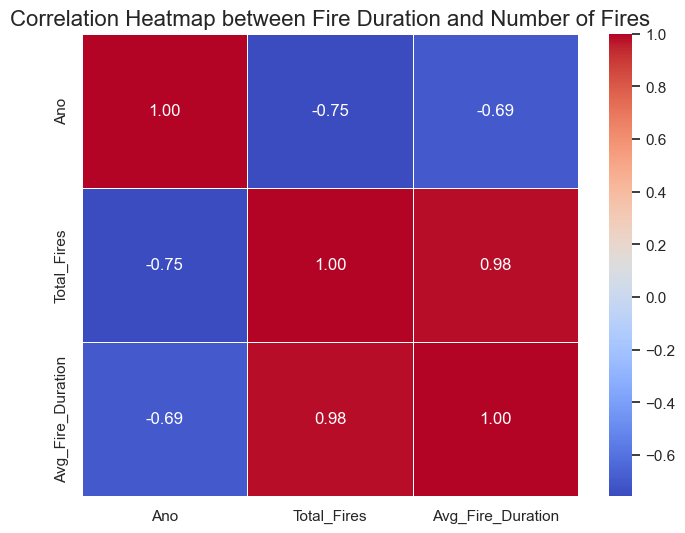

In [410]:
#Correlation Heatmap (Matrix) between Fire Duration and Number of Fires

# Step 1: Prepare data for correlation
# Calculate the total number of fires and average fire duration per year as before
total_fires_per_year = datasets['Estatisticas_PortugalContinent'].groupby('Ano')['Num_IncendiosRurais'].sum().reset_index()
total_fires_per_year = total_fires_per_year.rename(columns={"Num_IncendiosRurais": "Total_Fires"})

average_duration_per_year = filtered_fires.groupby('Ano')['Duracao_Horas'].mean().reset_index()
average_duration_per_year = average_duration_per_year.rename(columns={"Duracao_Horas": "Avg_Fire_Duration"})

# Merge datasets
merged_data = pd.merge(total_fires_per_year, average_duration_per_year, on='Ano')

# Step 2: Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Step 3: Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the title
plt.title('Correlation Heatmap between Fire Duration and Number of Fires', fontsize=16)

# Show the plot
plt.show()


<div style="text-align: justify;">
Following the heatmap, we can see some diferences if we settle Different Grouping Levels:
</div>

<div style="text-align: justify;">
In the initial correlation calculation in this file, there's a data grouping by district, while in the heatmap code, the grouping was by year. Grouping by district could capture more granular regional patterns, which might show a lower correlation. On the other hand, grouping by year could capture a more generalized trend across the entire dataset, potentially leading to a stronger correlation (0.98) if both metrics tend to increase or decrease similarly over time.
</div>

Lastly, it might be useful another view of the data distribution and correlation in order to see a possible relationship between two variables. Despite existing other methods we were recommended to follow during classes (methods we also performed), we thought the visual impact of a scatter plot with a linear regression line could add some more clarification.

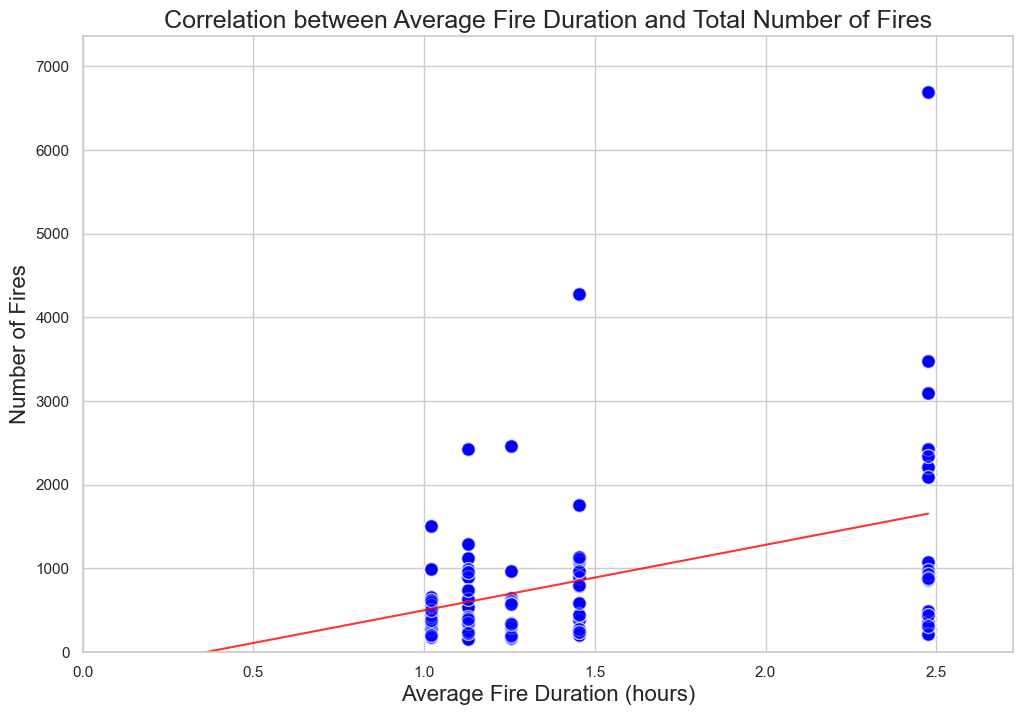

In [457]:
#This code creates a scatter plot showing the correlation between total fire duration and the average number of fires across all districts, 
# including a linear regression line if sufficient data points are available.

def plot_total_correlation_between_fire_duration_and_number_of_fires(datasets):
    """
    Creates a scatter plot showing the total correlation between AVERAGE fire duration 
    and the number of fires across all districts, with the regression line starting from 0.

    Args:
      datasets: Dictionary containing the datasets.
    """

    plt.figure(figsize=(12, 8))

    # Merge the datasets
    district_sgif = datasets['SGIF_2011_2020']
    district_stats = datasets['Estatisticas_Distrito']

    # Merge the two datasets on the year
    merged_data = pd.merge(district_sgif, district_stats, on='Ano', how='inner')

    # Calculate average fire duration per year
    average_fire_duration = merged_data.groupby('Ano')['Duracao_Horas'].mean().reset_index()

    # Merge average fire duration back into the main dataframe
    merged_data = pd.merge(merged_data, average_fire_duration, on='Ano', how='left')

    # Rename the columns to avoid confusion
    merged_data = merged_data.rename(columns={'Duracao_Horas_x': 'Duracao_Horas', 'Duracao_Horas_y': 'Avg_Duracao_Horas'})

    # Create a scatter plot for all data using average fire duration
    plt.scatter(merged_data['Avg_Duracao_Horas'], merged_data['Num_IncendiosRurais'], 
                color='blue', alpha=0.6, edgecolor='w', s=100)

    # Fit a linear regression line if there's enough data
    if len(merged_data) >= 2:  # Ensure there are at least 2 data points
        # Check for unique values to avoid fitting issues
        if merged_data['Avg_Duracao_Horas'].nunique() > 1 and merged_data['Num_IncendiosRurais'].nunique() > 1:
            m, b = np.polyfit(merged_data['Avg_Duracao_Horas'], merged_data['Num_IncendiosRurais'], 1)

            # Create x values for the regression line starting from 0
            x_line = np.linspace(0, merged_data['Avg_Duracao_Horas'].max(), 100)  
            y_line = m * x_line + b

            plt.plot(x_line, y_line, color='red', alpha=0.8)  # Line of best fit

    # Customize the plot
    plt.title('Correlation between Average Fire Duration and Total Number of Fires', fontsize=18)
    plt.xlabel('Average Fire Duration (hours)', fontsize=16)  # Changed x-axis label
    plt.ylabel('Number of Fires', fontsize=16)
    
    # Use 'Avg_Duracao_Horas' for x-axis limits
    plt.xlim(0, merged_data['Avg_Duracao_Horas'].max() * 1.1)  # Adjust x-axis limits  
    plt.ylim(0, merged_data['Num_IncendiosRurais'].max() * 1.1)  # Adjust y-axis limits
    
    plt.grid(True)

    # Show the plot
    plt.show()

# Plot the total correlation
plot_total_correlation_between_fire_duration_and_number_of_fires(datasets)

<div style="text-align: justify;">
A linear regression line in a scatter plot represents the best-fit line that summarizes the relationship between two variables. It is calculated based on the data points in the plot, indicating how one variable (the independent variable) influences the other (the dependent variable).
</div>

<div style="text-align: justify;">
This means that, in general, as the average duration of fires increases, the number of fires tends to increase as well. This slight tendency (moderate positive), in accordance with the remaining scenario described previously in this phase, helps to introduce this analysis into a more inferential part.

About trend indication, the slope of the line shows whether there is a positive or negative relationship between the variables:

    A positive slope indicates that as the independent variable increases, the dependent variable tends to increase as well.
    A negative slope indicates that as the independent variable increases, the dependent variable tends to decrease.

The line can be used to predict the value of the dependent variable based on new values of the independent variable.
</div>

<div style="text-align: justify;">
As it is a <strong>Positive Relationship</strong>, the line has a positive slope. In this case, it suggests that years with longer average fire durations tend to have a higher total number of fires.
</div>

<div style="text-align: justify;">
In accordance with the remaining scenario described previously in this phase, here's the context that helps us to introduce this analysis into the next phase: the inferential part.
</div>